In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score


Regressão

In [3]:
# Análise da base
df = pd.read_csv('stats1.csv')
df.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

In [4]:
# Separating variables
# X = df[['kills', 'turretkills', 'totminionskilled', 'inhibkills', 'wardskilled']]
X = df[['kills']]
y = df['goldearned']

In [5]:
samples = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:samples], y[:samples], test_size = 0.2)

In [6]:
# Transform data - Z-Normaliza a base
# mean_train = X_train.mean()
# std_train = X_train.std(ddof=1)

# Z_train = X_train.copy()
# Z_train = X_train - mean_train
# Z_train = Z_train/std_train
# Z_train 

# Z_test = X_test.copy()
# Z_test = X_test - mean_train
# Z_test = Z_test/std_train
# Z_test  

1- Estimar o gold do time de acordo com o número de objetivos, farm, kills feitos, além do tempo de partida.

In [7]:
clf = LinearRegression()
clf.fit(X_train.values, y_train.values)
y_val = y_test.values
y_hat = clf.predict(X_test.values)
# precision = (y_val == y_hat).mean()
error_mean = ((y_val - y_hat)**2).mean()
error_mean


aqui


8203299.472416388

In [38]:
def calculate_LinearRegression(X_train, y_train, X_test, y_test, columnToPrint, resultLabel):
    clf = LinearRegression()
    clf.fit(X_train.values, y_train.values)
    y_val = y_test.values
    y_hat = clf.predict(X_test.values)
    # precision = (y_val == y_hat).mean()
    error_mean = ((y_val - y_hat)**2).mean()

    slope = clf.coef_[0]
    intercept = clf.intercept_
    plt.figure(figsize=(12,8))
    plt.scatter(X_test[columnToPrint], y_val, marker='.', lw=2)
    plt.xlabel(columnToPrint)
    plt.ylabel(resultLabel)
    plt.title("Estimar o {} pela(o) {}".format(resultLabel, columnToPrint))
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    # Z_vals = x_vals - x_vals.mean()
    # Z_vals = Z_vals /Z_vals.std()
    y_vals = intercept + slope* x_vals
    plt.plot(x_vals, y_vals, '--', color='r', lw=6)
    print("A média do erro quadrado é {}".format(round(error_mean, 1) ))
    # return round(error_mean, 1)    


In [37]:
calculate_LinearRegression(X_train, y_train, X_test, y_test, "kills", "Gold adquirido")

KeyError: 'kills'

In [229]:
clf.coef_

array([2796.56153628])

In [239]:
intercept = clf.intercept_

(2,)


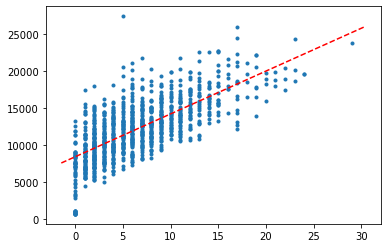

In [240]:

# plt.scatter(X_test['totminionskilled'][:samples], y_hat[:samples], label="1")

slope = clf.coef_[0]



plt.scatter(X_test['kills'], y_val, marker='.')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
# Z_vals = x_vals - x_vals.mean()
# Z_vals = Z_vals /Z_vals.std()
y_vals = intercept + slope* x_vals
print(y_vals.shape)
plt.plot(x_vals, y_vals, '--', color='r')
# plt.legend()

In [108]:
skf = StratifiedKFold(n_splits=, shuffle = True)
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    print('{}º fold'.format(fold))
    clf = LinearRegression()
    clf.fit(Z_train.values[train_index], y_train.values[train_index])
    print('aqui')
    y_val = y_train.values[val_index]
    y_hat = clf.predict(Z_train.values[val_index])
    # precision = (y_val == y_hat).mean()
    error_mean = ((y_val - y_hat)**2).mean()
    print('{} de erro'.format(error_mean))
    print('')
    print('')
    fold += 1

1º fold
aqui
4943109.02566222 de erro


2º fold
aqui
4886357.827338802 de erro


3º fold
aqui
4900008.575757057 de erro


4º fold
aqui
5148187.054215397 de erro


5º fold
aqui
5077476.855645815 de erro




2- Estimar a quantidade de kills, assistências e mortes de um campeão de acordo com gold recebido.

In [41]:
# Separating variables X and Y
# X = df[['kills', 'turretkills', 'totminionskilled', 'inhibkills', 'wardskilled']]
X = df[['goldspent']]
y = df['assists']

In [42]:
samples = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:samples], y[:samples], test_size = 0.2)

A média do erro quadrado é 33.5


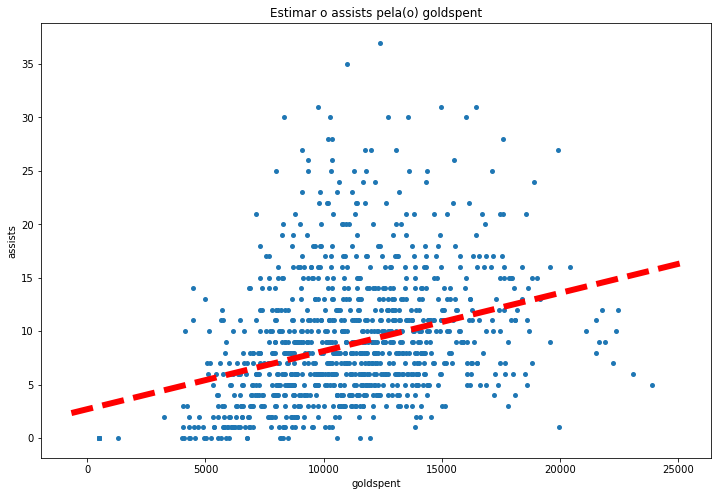

In [43]:
calculate_LinearRegression(X_train, y_train, X_test , y_test, "goldspent", "assists")

In [254]:
clf = LinearRegression()
clf.fit(X_train.values, y_train.values)
y_val = y_test.values
y_hat = clf.predict(X_test.values)
error_mean = ((y_val - y_hat)**2).mean()
error_mean

aqui


10.021551507150997

In [255]:
intercept = clf.intercept_

(2,)


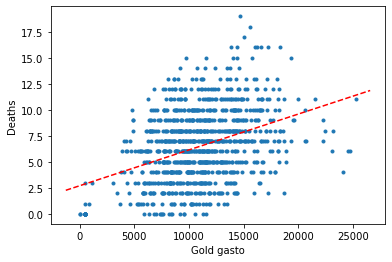

In [257]:

slope = clf.coef_[0]


plt.scatter(X_test['goldspent'], y_val, marker='.')
plt.xlabel('Gold gasto')
plt.ylabel('Deaths')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
# Z_vals = x_vals - x_vals.mean()
# Z_vals = Z_vals /Z_vals.std()
y_vals = intercept + slope* x_vals
print(y_vals.shape)
plt.plot(x_vals, y_vals, '--', color='r')
# plt.legend()